# Sismos en México

    ¿Si retiembla en sus centros la tierra?

# HIPOTESIS

    Con base en minitemblores (replicas), exista un patron que siga para despues de eso desatar un Temblor. 

    Ocurren mas temblores en Septiembre.

Una posibilidad es que los patrones climáticos en septiembre puedan ser más propicios para los terremotos. Por ejemplo, los niveles de humedad en septiembre suelen ser más altos que en otros meses, lo que podría conducir a un mayor estrés en la corteza terrestre. Además, la temporada de monzones de verano en México generalmente termina en septiembre, lo que también podría provocar más estrés en la corteza.


Otra posibilidad es que el número de personas en México que están al tanto de los terremotos sea mayor en septiembre. Esto se debe a que el terremoto del 19 de septiembre de 1985, que fue uno de los terremotos más mortíferos en la historia de México, ocurrió en septiembre. Como resultado, más personas pueden estar prestando atención a la actividad sísmica en septiembre que en otros meses.

Finalmente, también es posible que simplemente haya una coincidencia de que ocurran más terremotos en septiembre en México. Esto se debe a que la corteza terrestre se mueve constantemente y los terremotos pueden ocurrir en cualquier momento. Sin embargo, también es posible que exista una conexión real entre los patrones climáticos en septiembre y la ocurrencia de terremotos en México.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_T = pd.read_csv('TEMBLORES_2.csv')

C:\Users\luisl\AppData\Local\Temp\ipykernel_11896\3776067952.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_T = pd.read_csv('TEMBLORES_2.csv')


In [3]:
df_T.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado


Lo primero que vamos a hacer es ver de que estado tiene que ser un epicentro para que pueda sentirse en la CDMX

In [4]:
patrones= r', VER$|, OAX$|, MICH$|, BC$|, PUE$|, MEXICO$|, EDOMEX$|, MEX$|, JALISCO$|, CHIAPAS$|, GRO$|, JAL$|, CHIS$|, COL$'

In [5]:
# AQUI HAREMOS LA FUNCION PARA ENCONTRAR LOS PATRONES
def Ciudades(patron, columna):
    for i in columna:
        respuesta = re.search(patron, i)
        if respuesta:
            print (i)

In [6]:
df_T.drop(281899, inplace=True)
df_T.drop(281898, inplace=True)
df_T.drop(281897, inplace=True)
df_T.drop(281896, inplace=True)
df_T.drop(281895, inplace=True)
df_T.drop(281894, inplace=True)
df_T.drop(281893, inplace=True)

In [7]:
resultados = df_T[df_T['Referencia de localizacion'].str.contains(patrones, regex=True)]

# Obtener los datos completos de los registros que cumplen con el patrón
datos_completos = df_T.loc[resultados.index]

In [8]:
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
275326,06/03/2023,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado
276225,18/03/2023,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado
278328,18/04/2023,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado
278495,21/04/2023,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado


In [9]:
resultados2 = datos_completos[datos_completos['Referencia de localizacion'].str.contains(patrones, regex=True)]
resultados2

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
275326,06/03/2023,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado
276225,18/03/2023,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado
278328,18/04/2023,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado
278495,21/04/2023,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado


In [10]:
# Cambiamos el tipo de dato de magnitud ya que nos aparece que es un string y lo queremos en float
# Reemplazar los valores no numéricos por NaN
datos_completos['Magnitud'].replace('no calculable', np.nan, inplace=True)

# Cambiar el tipo de dato de la columna a float
datos_completos['Magnitud'] = datos_completos['Magnitud'].astype(float)

In [11]:
# RESULTADOS 2 Y DATOS COMPLETOS TIENEN LA MISMA CANTIDAD DE DATOS

datos_completos.loc[(datos_completos['Magnitud']>=6.0)]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7.0,19.0000,-107.000,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.7300,-106.000,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.3000,-91.800,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.5000,-100.500,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.2200,-98.120,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
244527,16/02/2022,01:12:23,6.2,13.8370,-91.573,62,"112 km al SURESTE de CD HIDALGO, CHIS",16/02/2022,07:12:23,revisado
259980,19/09/2022,13:05:09,7.7,18.2377,-103.269,12.1,"61 km al SUR de COALCOMAN, MICH",19/09/2022,18:05:09,revisado
260468,22/09/2022,01:16:08,6.9,18.0108,-103.155,8,"85 km al SUR de COALCOMAN, MICH",22/09/2022,06:16:08,revisado
266452,22/11/2022,10:39:05,6.2,30.6167,-116.393,10,"41 km al SUROESTE de VICENTE GUERRERO, BC",22/11/2022,16:39:05,revisado


In [12]:
df_T.shape

(281893, 10)

In [13]:
#ESTO FUE CON EL PRIMER PATRON SIN PONERLE EL SIGNO DE PESOS AL FINAL
281893-203945

77948

In [14]:
# ESTO YA FUE CON EL SIGNO DE PESOS PONIENDOLO AL FINAL
281893-189931

91962

In [15]:
datos_completos.isna().sum()

Fecha                             0
Hora                              0
Magnitud                      16944
Latitud                           0
Longitud                          0
Profundidad                       0
Referencia de localizacion        0
Fecha UTC                         0
Hora UTC                          0
Estatus                           0
dtype: int64

In [16]:
resultados2['Magnitud'].replace('no calculable', np.nan, inplace=True)

# Cambiar el tipo de dato de la columna a float
resultados2['Magnitud'] = resultados2['Magnitud'].astype(float)

In [17]:
resultados2.isna().sum()

Fecha                             0
Hora                              0
Magnitud                      16944
Latitud                           0
Longitud                          0
Profundidad                       0
Referencia de localizacion        0
Fecha UTC                         0
Hora UTC                          0
Estatus                           0
dtype: int64

In [18]:
# COMO VEMOS LOS DATOS QUE NOS APARECEN NULOS SON TEMBLORES QUE FUERON DEMASIADO PEQUEÑOS QUE NO SE PUDIERON CALCULAR ASI QUE LOS ELIMINAREMOS 

datos_completos.dropna()
resultados2.dropna()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,29/09/1950,00:32:20,7.0,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado
1,21/10/1950,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado
2,23/10/1950,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado
3,17/11/1950,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado
4,14/12/1950,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado
...,...,...,...,...,...,...,...,...,...,...
275326,06/03/2023,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado
276225,18/03/2023,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado
278328,18/04/2023,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado
278495,21/04/2023,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado


Se hizo un filtro para ver si habia datos ilogicos de que la magnitud fuera menor que 1, o mayor que 10 para investigar si en verdad ocurrio un temblor asi, ya que si ocurriera un temblor de esa magnitud, acabaria con muchas ciudades

Ahora lo que haremos sera pasar lo que es fecha y hora a un formato donde podamos manejarlo como numerico y ver si hay una cierta correlacion entre los datos

In [19]:
from datetime import datetime

In [20]:
# CONVIRTIENDO LOS DATOS DE LA COLUMNA FECHA A UN FORMATO FECHA PARA PODER VER SI HAY ALGUNA CORRELACION 

datos_completos['Fecha'] = pd.to_datetime(datos_completos['Fecha'], format="%d/%m/%Y")

In [21]:
datos_completos['Dias_De_La_Semana'] = datos_completos['Fecha'].dt.day_of_week
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Dias_De_La_Semana
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado,4
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado,5
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado,0
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado,4
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado,3
...,...,...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado,0
276225,2023-03-18,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado,5
278328,2023-04-18,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado,1
278495,2023-04-21,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado,4


In [22]:
datos_completos['Mes_Numerico'] = datos_completos['Fecha'].dt.month
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",29/09/1950,06:32:20,revisado,4,9
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",21/10/1950,09:42:58,revisado,5,10
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",23/10/1950,16:13:20,revisado,0,10
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",17/11/1950,19:28:23,revisado,4,11
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",14/12/1950,14:15:50,revisado,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",06/03/2023,19:53:21,verificado,0,3
276225,2023-03-18,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",18/03/2023,19:11:18,verificado,5,3
278328,2023-04-18,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",19/04/2023,04:55:31,verificado,1,4
278495,2023-04-21,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",21/04/2023,09:32:46,verificado,4,4


In [23]:
datos_completos.dropna(inplace=True)

In [24]:
datos_completos.shape

(238986, 12)

In [25]:
datos_completos['Fecha UTC'] = pd.to_datetime(datos_completos['Fecha UTC'], format="%d/%m/%Y")
datos_completos.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",1950-09-29,06:32:20,revisado,4,9
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",1950-10-21,09:42:58,revisado,5,10
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",1950-10-23,16:13:20,revisado,0,10
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",1950-11-17,19:28:23,revisado,4,11
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",1950-12-14,14:15:50,revisado,3,12


In [26]:
datos_completos.drop('Estatus', axis=1, inplace=True)

In [27]:
datos_completos

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.00,-107.00,60,"257 km al SUROESTE de PUERTO VALLARTA, JAL",1950-09-29,06:32:20,4,9
1,1950-10-21,03:42:58,6.6,17.73,-106.00,33,"225 km al SUROESTE de CIHUATLAN, JAL",1950-10-21,09:42:58,5,10
2,1950-10-23,10:13:20,7.2,14.30,-91.80,33,"56 km al SURESTE de CD HIDALGO, CHIS",1950-10-23,16:13:20,0,10
3,1950-11-17,13:28:23,6.6,17.50,-100.50,33,"33 km al NORTE de ATOYAC DE ALVAREZ, GRO",1950-11-17,19:28:23,4,11
4,1950-12-14,08:15:50,7.2,17.22,-98.12,33,"47 km al OESTE de H TLAXIACO, OAX",1950-12-14,14:15:50,3,12
...,...,...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.08,-104.20,2.9,"98 km al SUR de CD DE ARMERIA, COL",2023-03-06,19:53:21,0,3
276225,2023-03-18,13:11:18,3.6,19.54,-102.30,14.7,"12 km al ESTE de PERIBAN, MICH",2023-03-18,19:11:18,5,3
278328,2023-04-18,22:55:31,5.1,17.22,-101.12,16.3,"38 km al SURESTE de PETATLAN, GRO",2023-04-19,04:55:31,1,4
278495,2023-04-21,03:32:46,3.5,30.76,-114.62,2.3,"36 km al SURESTE de SAN FELIPE, BC",2023-04-21,09:32:46,4,4


In [28]:
print(f'Datos del mes ENERO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==1)].shape[0]}')
print(f'Datos del mes FEBRERO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==2)].shape[0]}')
print(f'Datos del mes MARZO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==3)].shape[0]}')
print(f'Datos del mes ABRIL : {datos_completos.loc[(datos_completos["Fecha"].dt.month==4)].shape[0]}')
print(f'Datos del mes MAYO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==5)].shape[0]}')
print(f'Datos del mes JUNIO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==6)].shape[0]}')
print(f'Datos del mes JULIO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==7)].shape[0]}')
print(f'Datos del mes AGOSTO : {datos_completos.loc[(datos_completos["Fecha"].dt.month==8)].shape[0]}')
print(f'Datos del mes SEPTIEMBRE : {datos_completos.loc[(datos_completos["Fecha"].dt.month==9)].shape[0]}')
print(f'Datos del mes OCTUBRE : {datos_completos.loc[(datos_completos["Fecha"].dt.month==10)].shape[0]}')
print(f'Datos del mes NOVIEMBRE : {datos_completos.loc[(datos_completos["Fecha"].dt.month==11)].shape[0]}')
print(f'Datos del mes DICIEMBRE : {datos_completos.loc[(datos_completos["Fecha"].dt.month==12)].shape[0]}')

Datos del mes ENERO : 21751
Datos del mes FEBRERO : 21369
Datos del mes MARZO : 19757
Datos del mes ABRIL : 18518
Datos del mes MAYO : 18297
Datos del mes JUNIO : 18616
Datos del mes JULIO : 18058
Datos del mes AGOSTO : 17655
Datos del mes SEPTIEMBRE : 22949
Datos del mes OCTUBRE : 18566
Datos del mes NOVIEMBRE : 21384
Datos del mes DICIEMBRE : 22066


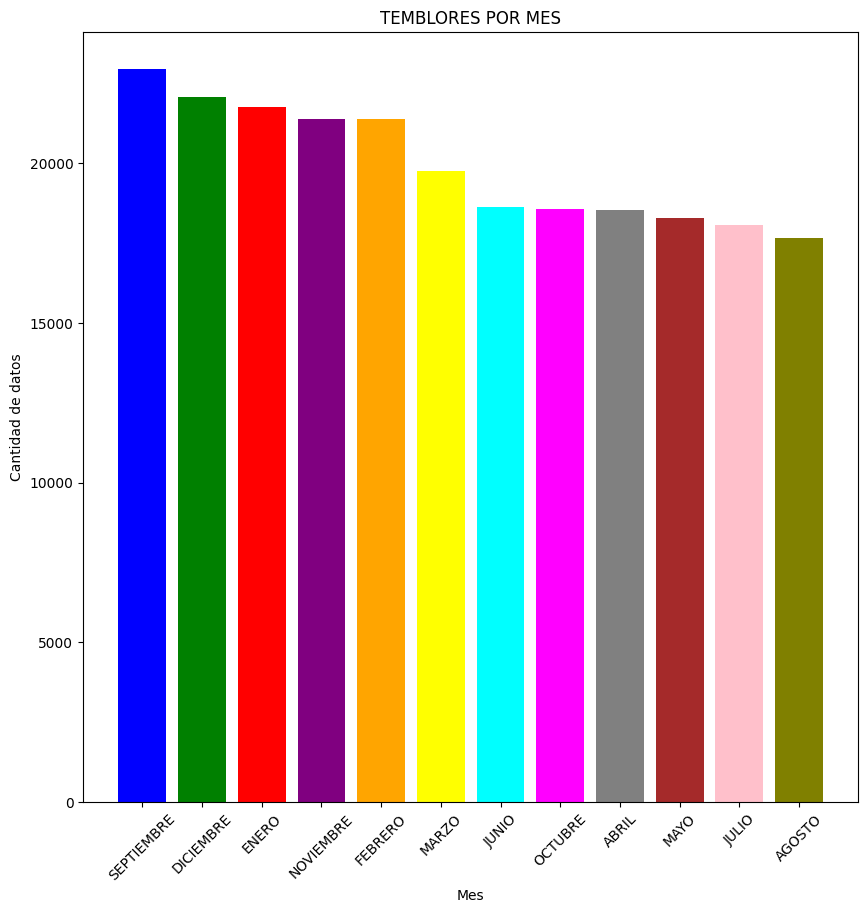

In [29]:
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
datos = [21751, 21369, 19757, 18518, 18297, 18616, 18058, 17655, 22949, 18566, 21384, 22066]
colores = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown', 'pink', 'olive']

datos_ordenados = sorted(zip(datos, meses), reverse=True)
datos_ordenados, meses_ordenados = zip(*datos_ordenados)

plt.figure(figsize=(10,10))
plt.bar(meses_ordenados, datos_ordenados, color=colores)
plt.xlabel('Mes')
plt.ylabel('Cantidad de datos')
plt.title('TEMBLORES POR MES')
plt.xticks(rotation=45)
plt.show()

Ya con el dataframe listo,, procederemos a contestar las siguienres preguntas

¿Cuál es el número total de temblores registrados? #CHECK

¿Cuál fue el temblor de mayor magnitud registrado? #CHECK

¿En qué fecha y ubicación ocurrió el temblor de mayor magnitud? #CHECK

¿Cuántos temblores ocurrieron en un período de tiempo específico?

¿Cuál es la magnitud promedio de los temblores registrados? #CHECK

¿Cuál es la ubicación más común de los temblores? # CHECK

¿Cuál es la distribución de los temblores según su magnitud? #CHECK

¿Cuáles son los temblores más recientes registrados?

¿Cuántos temblores ocurrieron en cada mes/año? #CHECK

¿Existe alguna correlación entre la profundidad del temblor y su magnitud?

In [30]:
# El numero total de temblores registrados en la zona que nos interesa es de:
print(f'El numero total de temblores en la zona que nos interesa es de: {datos_completos.shape[0]}')

El numero total de temblores en la zona que nos interesa es de: 238986


In [31]:
df_T['Magnitud'].replace('no calculable', np.nan, inplace=True)

# Cambiar el tipo de dato de la columna a float
df_T['Magnitud'] = df_T['Magnitud'].astype(float)

In [32]:
# La magnitud promedido de los temblores registrados en la zona que nos interesa es: 

print(f'La magnitud promedio de los temblores es: {datos_completos["Magnitud"].mean()}')

print(f'La magnitud promedio de todo el dataframe es de: {df_T["Magnitud"].mean()}')

La magnitud promedio de los temblores es: 3.648522089160035
La magnitud promedio de todo el dataframe es de: 3.642395286174899


In [33]:
# El temblor de mayor magnitud registrado en todo el dataframe es de:
print(f'La maxima magnitud registrada en todo el dataframe es de: {df_T["Magnitud"].max()}')

# El temblor de mayor magnitud registrado en la zona que nos interesa es de:
print(f'La maxima magnitud registrada en todo el dataframe es de: {datos_completos["Magnitud"].max()}')

La maxima magnitud registrada en todo el dataframe es de: 8.2
La maxima magnitud registrada en todo el dataframe es de: 8.2


In [34]:
datos_completos.loc[datos_completos['Magnitud']>8]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Dias_De_La_Semana,Mes_Numerico
16589,1985-09-19,07:17:49,8.1,18.419,-102.468,15,"45 km al NOROESTE de LA MIRA, MICH",1985-09-19,13:17:49,3,9
109220,2017-09-07,23:49:17,8.2,14.761,-94.103,45.9,"140 km al SUROESTE de PIJIJIAPAN, CHIS",2017-09-08,04:49:17,3,9


El temblor mas fuerte registrado ocurrio en el año 2017 del mes de septiembre el dia 7 osea El dia jueves a las 11 con 49 min y 17 segundos.

El epicentro fue 140 km al SUROESTE de PIJIJIAPAN, CHIAPAS, y con las coordenadas que nos dan es la playa de cocos

In [35]:
from PIL import Image

# Abrir la imagen utilizando PIL
imagen = Image.open("C:\\Users\\luisl\\OneDrive\\Escritorio\\Proyectos\\Captura de pantalla 2023-06-19 094558.png")

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Ocultar los ejes
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\luisl\\OneDrive\\Escritorio\\Proyectos\\Captura de pantalla 2023-06-19 094558.png'

In [ ]:
# ¿Cuál es la ubicación más común de los temblores?
print(f'El estado mas comun donde surgen los temblores es: {datos_completos["Referencia de localizacion"].value_counts().idxmax()}')

El estado mas comun donde surgen los temblores es: 12 km al SUROESTE de PINOTEPA NACIONAL, OAX


In [ ]:
datos_completos.loc[datos_completos['Referencia de localizacion']=='12 km al SUROESTE de PINOTEPA NACIONAL, OAX']

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Dias_De_La_Semana,Mes_Numerico
29575,1998-12-18,02:27:20,4.4,16.2500,-98.1100,3,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",1998-12-18,08:27:20,4,12
31069,2000-05-02,01:30:04,3.7,16.2400,-98.1000,5,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2000-05-02,06:30:04,1,5
31690,2000-12-05,21:49:13,3.9,16.2400,-98.0900,16,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2000-12-06,03:49:13,1,12
33943,2002-06-19,16:50:08,5.5,16.2400,-98.0900,8,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2002-06-19,21:50:08,2,6
36358,2004-02-27,00:55:53,3.8,16.3000,-98.1600,10,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2004-02-27,06:55:53,4,2
...,...,...,...,...,...,...,...,...,...,...,...
264922,2022-11-05,23:44:26,3.0,16.2913,-98.1563,18.7,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2022-11-06,05:44:26,5,11
265885,2022-11-16,07:22:47,3.3,16.2407,-98.1025,11.6,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2022-11-16,13:22:47,2,11
266639,2022-11-23,06:12:18,3.4,16.2438,-98.1072,9.4,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2022-11-23,12:12:18,2,11
267656,2022-12-01,05:12:13,3.1,16.2525,-98.1122,12,"12 km al SUROESTE de PINOTEPA NACIONAL, OAX",2022-12-01,11:12:13,3,12


In [ ]:
datos_completos = datos_completos[datos_completos['Profundidad'] != 'en revision']

In [ ]:
datos_completos.loc[datos_completos['Profundidad'] == 'no calculable', 'Profundidad'] = np.nan
datos_completos['Profundidad'] = datos_completos['Profundidad'].astype(float)

C:\Users\luisl\AppData\Local\Temp\ipykernel_16124\2263083825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_completos['Profundidad'] = datos_completos['Profundidad'].astype(float)


In [ ]:
print(f'El promedio de la Latitud {datos_completos["Latitud"].mean()}')
print(f'El promedio de la Latitud {datos_completos["Longitud"].mean()}')

El promedio de la Latitud 17.330027145630904
El promedio de la Latitud -98.47528073597965


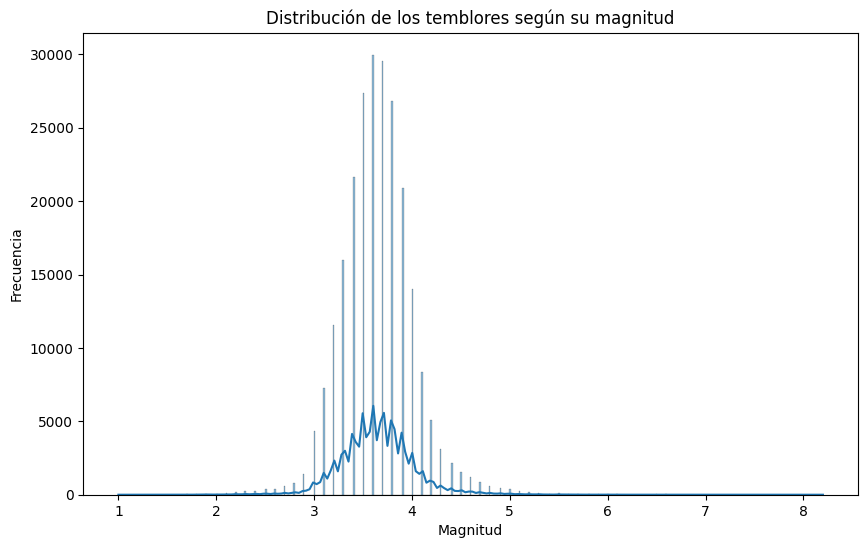

In [ ]:
# ¿Cuál es la distribución de los temblores según su magnitud?
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_completos, x='Magnitud', kde=True)

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de los temblores según su magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [ ]:
# ¿Cuáles son los temblores más recientes registrados?

datos_completos.tail(100)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Dias_De_La_Semana,Mes_Numerico
270628,2022-12-30,14:14:55,3.6,15.8242,-96.2598,48.5,"15 km al NOROESTE de CRUCECITA, OAX",2022-12-30,20:14:55,4,12
270630,2022-12-30,14:47:57,3.4,16.6060,-99.2937,8.5,"23 km al SURESTE de SAN MARCOS, GRO",2022-12-30,20:47:57,4,12
270631,2022-12-30,14:59:40,3.8,15.1518,-94.5558,18.9,"133 km al SURESTE de SALINA CRUZ, OAX",2022-12-30,20:59:40,4,12
270632,2022-12-30,15:09:09,3.9,16.6482,-99.6500,2.7,"32 km al SUROESTE de SAN MARCOS, GRO",2022-12-30,21:09:09,4,12
270633,2022-12-30,15:44:14,3.4,30.8748,-116.1280,5.6,"21 km al NOROESTE de VICENTE GUERRERO, BC",2022-12-30,21:44:14,4,12
...,...,...,...,...,...,...,...,...,...,...,...
275326,2023-03-06,13:53:21,4.0,18.0800,-104.2000,2.9,"98 km al SUR de CD DE ARMERIA, COL",2023-03-06,19:53:21,0,3
276225,2023-03-18,13:11:18,3.6,19.5400,-102.3000,14.7,"12 km al ESTE de PERIBAN, MICH",2023-03-18,19:11:18,5,3
278328,2023-04-18,22:55:31,5.1,17.2200,-101.1200,16.3,"38 km al SURESTE de PETATLAN, GRO",2023-04-19,04:55:31,1,4
278495,2023-04-21,03:32:46,3.5,30.7600,-114.6200,2.3,"36 km al SURESTE de SAN FELIPE, BC",2023-04-21,09:32:46,4,4


In [ ]:
datos_completos.loc[(datos_completos['Fecha'].dt.month==9)]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Dias_De_La_Semana,Mes_Numerico
0,1950-09-29,00:32:20,7.0,19.0000,-107.0000,60.0,"257 km al SUROESTE de PUERTO VALLARTA, JAL",1950-09-29,06:32:20,4,9
12,1955-09-26,02:28:20,6.9,15.5000,-92.5000,200.0,"31 km al NOROESTE de MOTOZINTLA, CHIS",1955-09-26,08:28:20,0,9
19,1961-09-01,12:50:34,6.6,13.5000,-92.6600,25.0,"141 km al SUROESTE de CD HIDALGO, CHIS",1961-09-01,18:50:34,4,9
234,1974-09-01,07:49:38,4.9,13.3000,-88.9100,111.0,"382 km al SURESTE de CD HIDALGO, CHIS",1974-09-01,13:49:38,6,9
235,1974-09-02,16:04:31,4.6,13.1800,-90.7500,41.0,"224 km al SURESTE de CD HIDALGO, CHIS",1974-09-02,22:04:31,0,9
...,...,...,...,...,...,...,...,...,...,...,...
261532,2022-09-30,18:07:39,3.6,18.1078,-103.2820,12.3,"75 km al SUR de COALCOMAN, MICH",2022-09-30,23:07:39,4,9
261533,2022-09-30,18:12:23,3.8,15.5000,-95.9780,7.2,"34 km al SURESTE de CRUCECITA, OAX",2022-09-30,23:12:23,4,9
261534,2022-09-30,18:15:57,3.6,18.0888,-103.3120,8.8,"78 km al SUR de COALCOMAN, MICH",2022-09-30,23:15:57,4,9
261535,2022-09-30,18:21:15,3.7,15.9855,-95.1407,26.0,"23 km al SURESTE de SALINA CRUZ, OAX",2022-09-30,23:21:15,4,9


In [ ]:
# calcular las probabiliadades dado que ya temblo en septiembre y es el mes en el que mas tiembla
datos_completos.shape[0]

238974

In [ ]:
print(f'La probabiliad de que tiemble en septiembre es de: {((22949)/238974)*100}%')

La probabiliad de que tiemble en septiembre es de: 9.60313674290927%


In [ ]:
238974-22949

216025

In [ ]:
# FALTAN 73 DIAS PARA SEPTIEMBRE 
# EL EXITO ES QUE TIEMBLE EN SEPTIEMBRE Y NUESTRA X SERIA EL NUMERO DE DIAS TRANSCURRIDOS DESADE EL ULTIMO TEMBLOR HASTA LA FECHA ACTUAL HAN PASADO 274 DIAS
# DESDE EL 19 DE SEPTIEMBRE DEL 2022 HASTA AHORITA 19 DE JUNIO DEL 2023
# ENSAYOS FALLIDOS 

def distribucion_geometrica(probabilidad, intentos):
    f = (1-probabilidad)**(intentos-1) * (probabilidad)
    return f

print(f'La probalidad de que tiemble en septiembre utilizando los dias restantes para septiembre es de {distribucion_geometrica(0.0960313674290927, 73)}')

print(f'La probalidad de que tiemble en septiembre utilizando los dias que pasaron desde el ultimo temblor de septiembre es de {distribucion_geometrica(0.0960313674290927, 274)}')

La probalidad de que tiemble en septiembre utilizando los dias restantes para septiembre es de 6.690446380825399e-05
La probalidad de que tiemble en septiembre utilizando los dias que pasaron desde el ultimo temblor de septiembre es de 1.0286807815249055e-13


In [ ]:
from scipy.stats import poisson

# Promedio histórico de temblores en septiembre
lambda_param = 0.09

# Calcular la función de probabilidad P(X = k) para diferentes valores de k
for k in range(0, 5):
    probabilidad = poisson.pmf(k, lambda_param)
    print(f'P(X = {k}) = {probabilidad*100}')

P(X = 0) = 91.39311852712282
P(X = 1) = 8.225380667441053
P(X = 2) = 0.37014213003484725
P(X = 3) = 0.011104263901045415
P(X = 4) = 0.00024984593777352187


In [37]:
datos_completos.columns

Index(['Fecha', 'Hora', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
       'Referencia de localizacion', 'Fecha UTC', 'Hora UTC',
       'Dias_De_La_Semana', 'Mes_Numerico'],
      dtype='object')

Las distribuciones que podemos utlizar es la distribucionde poisson
    el numero de eventos que ocurrieron en un period ya sea por mes o por año

La distribucion binomial negativa 

La distribucion normal larga

La distribucion binomial negativa 
import scipy.stats as stats

Create a negative binomial distribution object
nb = stats.nbinom(5, 0.5)

Fit the negative binomial distribution to your dataset
nb.fit(df["Frequency"])

Calculate the probability of observing a certain number of earthquakes
probability = nb.pmf(2)

print(probability)

P(X = k) = (k + r - 1)C_k * p^k * (1 - p)^r

X es el número de éxitos
k es el número de ensayos
r es el número de éxitos
p es la probabilidad de éxito
C_k es el coeficiente binomial

probability = nb.pmf(2)

El método pmf() toma el número de terremotos como entrada y devuelve la probabilidad de observar ese número de terremotos. En este caso, el método pmf() devolverá la probabilidad de observar 2 terremotos en 5 ensayos, dado que la probabilidad de éxito para cada ensayo es de 0,5.

La distribucion normal larga 

f(x) = 1 / (x * σ * √(2π)) * exp(-(ln(x) - μ)^2 / (2 * σ^2))

x es la magnitud del terremoto
μ es la media de la distribución
σ es la desviación estándar de la distribución
ln(x) es el logaritmo natural de x
π es la constante matemática π

import scipy.stats as stats

Create a log-normal distribution object
ln = stats.lognorm(5, 2)

Set the mean and standard deviation of the distribution
ln.mean = 5
ln.std = 2

Calculate the probability of observing a certain magnitude of earthquake
probability = ln.pdf(6)

print(probability)

probability = ln.pdf(6)


El método pdf() toma la magnitud del terremoto como entrada y devuelve la probabilidad de observar esa magnitud de terremoto. En este caso, el método pdf() devolverá la probabilidad de observar un terremoto con una magnitud de 6, dado que la media de la distribución log-normal es 5 y la desviación estándar de la distribución log-normal es 2.